In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

<h2 style="color:blue" align="center">Tensorboard demo using handwritten digits classification using neural network</h2>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

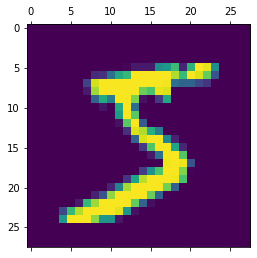

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [10]:
X_train_flattened.shape

(60000, 784)

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 1s 613us/step - loss: 0.2732 - accuracy: 0.9226
Epoch 2/5
1875/1875 [==============================] - 1s 620us/step - loss: 0.1233 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 1s 616us/step - loss: 0.0861 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 1s 610us/step - loss: 0.0674 - accuracy: 0.9792
Epoch 5/5
1875/1875 [==============================] - 1s 604us/step - loss: 0.0526 - accuracy: 0.9838


In [12]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

Either run above inline magic or go to git bash or your command prompt and type below to run it,
`tensorboard --logdir logs/`
This will launch tensorboard at this url which you can open in your browser `http://localhost:6006/`

In [13]:
model.get_weights()

[array([[ 0.00506803, -0.06816731, -0.06368009, ..., -0.02314919,
          0.03003517, -0.01760872],
        [-0.02690735, -0.03227119, -0.07390068, ...,  0.01868456,
         -0.08084331,  0.03528819],
        [-0.04704716, -0.07875957,  0.05555449, ..., -0.00402315,
         -0.03514366,  0.04002132],
        ...,
        [-0.0729377 ,  0.00793296, -0.01504979, ..., -0.04388302,
         -0.0212856 ,  0.00872298],
        [-0.01450596,  0.06140146,  0.01812381, ...,  0.07643534,
          0.05958268,  0.01693662],
        [-0.00566357,  0.06858706,  0.0374121 , ..., -0.01954078,
         -0.03953671, -0.07195499]], dtype=float32),
 array([ 0.06687257,  0.06995872,  0.03611562,  0.07399879,  0.08554802,
        -0.01519078,  0.00172929,  0.03873563, -0.07062035, -0.0171828 ,
         0.07439952,  0.05718894,  0.12608798,  0.04130425, -0.05148511,
        -0.020448  ,  0.07907575,  0.14033692,  0.08354704,  0.16652158,
         0.04399183,  0.10490174, -0.06597061, -0.09574447,  0.017